<a href="https://colab.research.google.com/github/mateuspestana/codelab22_1/blob/main/meeting_11/CodeLab_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais - Uma brevíssima introdução

No encontro de hoje, iremos entender um pouco mais por trás do conceito de redes neurais. Redes Neurais (ou redes neuronais) são uma série de algoritmos que mimetizam o sistema nervoso humano e, com isso, ganham capacidade de aprendizado e de reconhecimento de padrões como nós fazemos. 

Em uma rede neural, temos unidades chamadas de neurons. Esses neurons, também chamados de __*perceptrons*__, simulam algum modelo matemático, guardando dentro de si uma informação, e com entradas e saída. 

![](https://www.deeplearningbook.com.br/wp-content/uploads/2017/12/perceptron.png)

No caso do perceptron acima, ele tem 3 conexões, cada conexão representa um número, um valor. Quando essa informação passa através dele, gera um *output* que, dependendo do cálculo executado dentro dele, é um valor completamente distinto. Vamos supor, com um nível mais ampliado e generalizado: queremos saber se hoje vai chover. De quais informações precisamos? 

$x_1$ - temperatura (numérico, contínuo)

$x_2$ - umidade do ar (numérico, contínuo)

$x_3$ - se há nuvens no céu (binário, 0-1)

Nosso *perceptron* vai, a partir do treinamento, "entender" essas informações recebidas e dar um *output* que a partir de um algoritmo, decidirá a partir de um valor, dentro de um limiar estabelecido, se vai chover ou não.

![](https://www.deeplearningbook.com.br/wp-content/uploads/2017/12/output.png)

Uma rede neural, em geral, pode ser representada pelo seguinte gráfico:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/592px-Colored_neural_network.svg.png)

Nela, os neurons da camada de input são os que recebem dados externos - o nosso dataset. A camada "escondida" é o que existe entre a camada de input e de output, que representa, como o nome diz, a camada que nos entrega um ou mais resultados e, a partir deles, temos uma solução para o nosso problema. 

Se pensarmos no nosso problema de chuva no céu, uma simples regressão logística com as mesmas variáveis poderia resolver essa questão climática. Todavia, e quando as respostas não podem ser facilmente modeladas? E se forem imagens? E se forem *imagens em tempo real*, como um carro que se dirige sozinho? As redes neurais são bastante poderosas se bem implementadas e podem resolver quase todos os problemas que podem ser resolvidos. 

__Mas qual a grande virada da rede neural?__

> A grande sacada da rede neural é que a cada treino, ou seja, a cada processo de input de dados, passando-o através das camadas escondidas, a colheita do output e a validação (ou seja, a comparação com os dados "reais"), dizendo o quanto o modelo acertou ou errou, é repetido várias vezes com um sistema de *back-propagation*, ou seja, os pesos dentro dos neurons mudam de acordo com o output e estão em constante mudança durante o processo de aprendizagem. Os dados fazem um caminho contrário, os pesos são ajustados, um novo resultado é gerado, mensurado, e assim sucessivamente até estarmos satisfeitos. 

![](https://www.deeplearningbook.com.br/wp-content/uploads/2017/12/neuronio-1.png)


## Alguns conceitos importantes

### Hiperparâmetros

Os hiperparâmetros são os parâmetros da rede que são "aprendidos" ao longo do tempo.

### Função de perda

É uma forma de avaliar o quanto melhoramos (ou pioramos), comparando o nosso output com o output verdadeiro, ou seja, os dados de tese. A função de perda (*loss function*) reduz o modelo a um valor, como um R2 na nossa famosa regressão linear: 1 menos o somatório da diferença das distâncias ao quadrado

![](https://miro.medium.com/max/1200/1*_HbrAW-tMRBli6ASD5Bttw.png)

No caso das redes neurais, usamos uma similar (quais as similaridades?) que é o Erro Quadrático Médio, ou *Mean Square Error*:

![](https://miro.medium.com/max/1400/1*Eytb8aZNrhbGLmBvWQrpeg.png)

### Otimização 

O processo de otimização leva em consideração uma taxa de aprendizagem e a função de perda. É como uma pessoa no alto de uma montanha que quer encontrar o ponto mais baixo daquela região. O que ela faz? Ela anda, dando um passo, e mede o quanto ela subiu ou desceu. A mensura do quanto ela subiu ou desceu em relação ao ponto anterior, é a função de perda (ou custo). O tamanho do passo é a taxa de aprendizagem. Se o passo dela por de 10cm, ela pode demorar muito tempo para encontrar o mínimo. Se ela pode dar um passo de 100m, ela talvez passe pelo mínimo e o pule, sem percebê-lo. 

![](https://www.researchgate.net/publication/341031637/figure/fig5/AS:885839185850375@1588211928990/Learning-rate-a-values-A-small-value-produces-slow-convergence-while-a-high-value-could.ppm)

O algoritmo de otimização que costumamos usar em redes neurais, ao menos quando começamos a aprender sobre e explorá-las, é o SGD - *Stochastic Gradient Descent*, no qual vamos "caminhando" ao longo dos dados e descobrindo seus pontos máximos e mínimos.


### Funções de ativação

![](https://miro.medium.com/max/1400/1*jHdygwPP8E3wxn-f_Ea1Uw.png)

Também chamadas de funções de transferência, é a função pela qual aquele perceptron tenta ajustar os dados. Quanto mais neurons e camadas, temos uma rede mais passível de ser ajustada a qualquer tipo de dado, mas ao mesmo tempo, se saturarmos a rede, ela fica superajustada aos dados de treino e também mais difícil de ser treinada (muitos neurônios -> mais tempo). Uma rede muito simples, com uma só camada e poucos neurons, tambem pode significar que a sua predição dos dados é mais simplista. Tudo depende do que se quer obter ao final, e um *trade-off* disso. 

# Uma rede neural, em resumo:

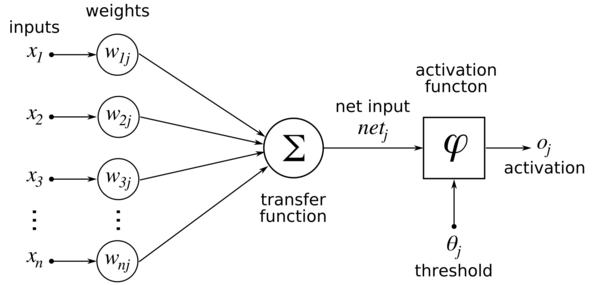

# Mão na massa

In [ ]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torch.distributions.uniform as urand
import matplotlib.pyplot as plt

In [ ]:
# Toda rede é uma classe. Uma classe é uma blueprint de um objeto que vai existir.
# Para criar uma rede, precisamos criar então uma classe que herda características de nn.Module

class LineNetwork(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(1, 1) # Temos aqui uma camada linear com 1 neurônio de entrada e um de saída
    )

  
  def forward(self, x):
    return self.layers(x)

Vamos criar uma classe de dataset que criará um determinado número de dados a partir de uma equação. Nessa equação, atribuiremos coeficientes que, no final, será o que queremos "adivinhar" com a rede neural. Sempre precisaremos fazer isso, ainda que não utilizemos uma função (o que é 99,9% dos casos, já que usaremos dados reais).

In [ ]:
class AlgebraicDataset(Dataset):
  def __init__(self, f, interval, nsamples):
    X = urand.Uniform(interval[0], interval[1]).sample([nsamples])
    self.data = [(x, f(x)) for x in X]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

In [ ]:
line = lambda x: 93*x + 13
interval = (-10, 10)
train_nsamples = 10000
test_nsamples = 1000

In [ ]:
train_dataset = AlgebraicDataset(line, interval, train_nsamples)
test_dataset = AlgebraicDataset(line, interval, test_nsamples)

# Precisamos criar um dataloader, que é a forma com que os dados serão inseridos dentro da rede.
train_dataloader = DataLoader(train_dataset, batch_size=train_nsamples, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=test_nsamples, shuffle=True)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Rodando na {device}")

model = LineNetwork().to(device)


# Erro quadrático médio (Mean Squared Error)
lossfunc = nn.MSELoss()

# SGD = Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# taxa de aprendizado lr = learning rate

Rodando na cuda


In [ ]:
def train(model, dataloader, lossfunc, optimizer):
  model.train()
  cumloss = 0.0
  for X, y in dataloader:
    X = X.unsqueeze(1).float().to(device)
    y = y.unsqueeze(1).float().to(device)

    pred = model(X)
    loss = lossfunc(pred, y)

    # zera os gradientes acumulados
    optimizer.zero_grad()
    # computa os gradientes
    loss.backward()
    # anda, de fato, na direção que reduz o erro local
    optimizer.step()

    # loss é um tensor; item pra obter o float
    cumloss += loss.item() 
  
  return cumloss / len(dataloader)


def test(model, dataloader, lossfunc):
  model.eval()
  
  cumloss = 0.0
  with torch.no_grad():
    for X, y in dataloader:
      X = X.unsqueeze(1).float().to(device)
      y = y.unsqueeze(1).float().to(device)

      pred = model(X)
      loss = lossfunc(pred, y)
      cumloss += loss.item() 
  
  return cumloss / len(dataloader)

In [ ]:
# Gráfico pra visualizar a rede sendo treinada
def plot_comparinson(f, model, interval=(-10, 10), nsamples=10):
  fig, ax = plt.subplots(figsize=(10, 10))

  ax.grid(True, which='both')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')

  samples = np.linspace(interval[0], interval[1], nsamples)
  model.eval()
  with torch.no_grad():
    pred = model(torch.tensor(samples).unsqueeze(1).float().to(device))

  ax.plot(samples, list(map(f, samples)), "o", label="ground truth")
  ax.plot(samples, pred.cpu(), label="model")
  plt.legend()
  plt.show()

Epoch: 0; Train Loss: 291180.59375


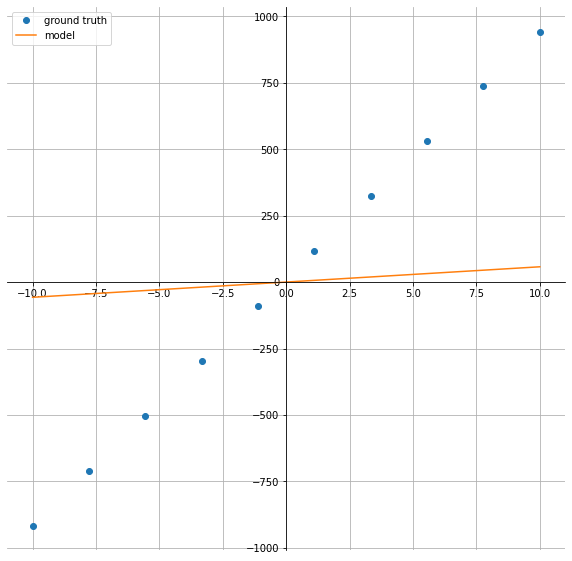

Epoch: 50; Train Loss: 429.1543884277344


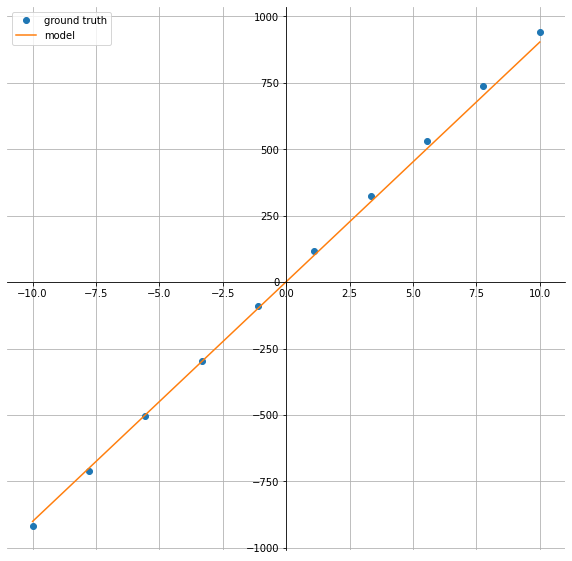

Epoch: 100; Train Loss: 109.6086196899414


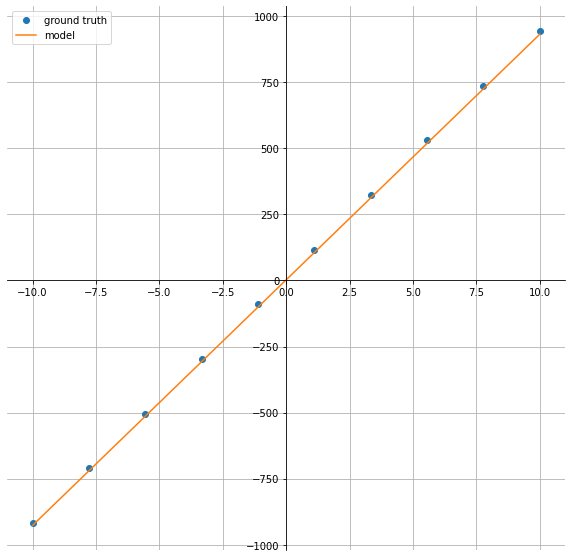

Epoch: 150; Train Loss: 89.47647094726562


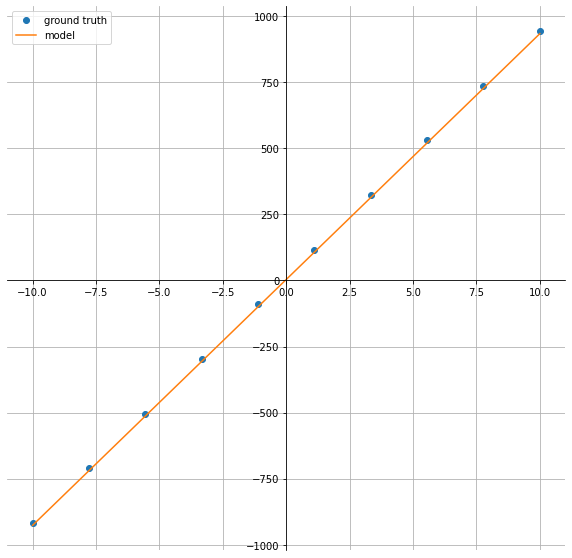

Epoch: 200; Train Loss: 73.24223327636719


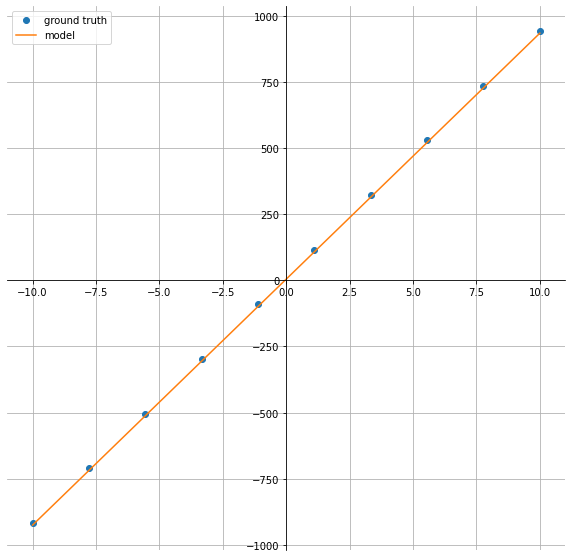

Epoch: 250; Train Loss: 59.953643798828125


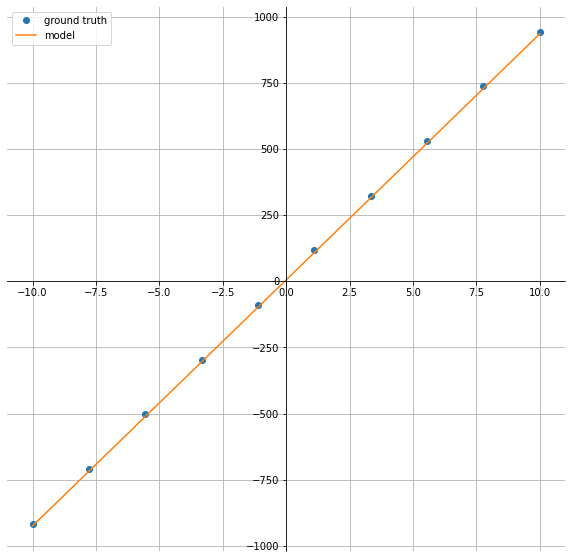

Epoch: 300; Train Loss: 49.07606887817383


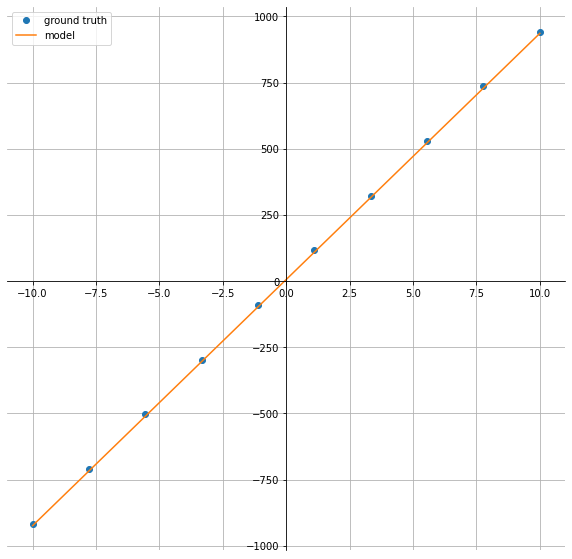

Epoch: 350; Train Loss: 40.172035217285156


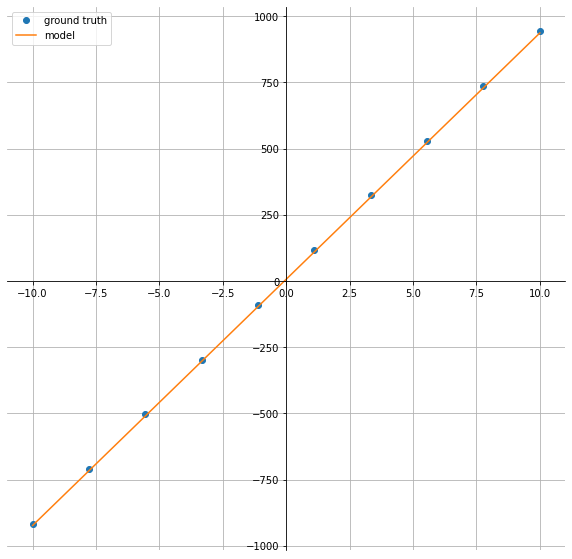

Epoch: 400; Train Loss: 32.88349914550781


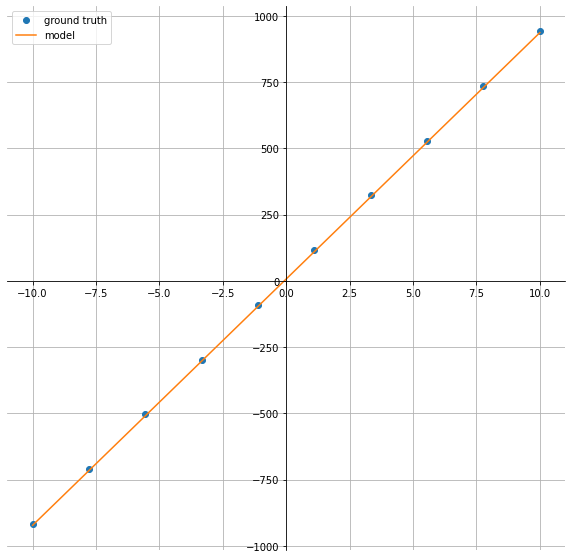

Epoch: 450; Train Loss: 26.917339324951172


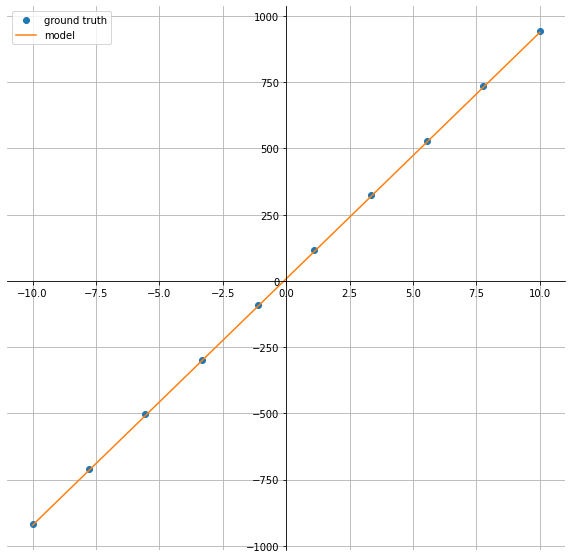

Epoch: 500; Train Loss: 22.033653259277344


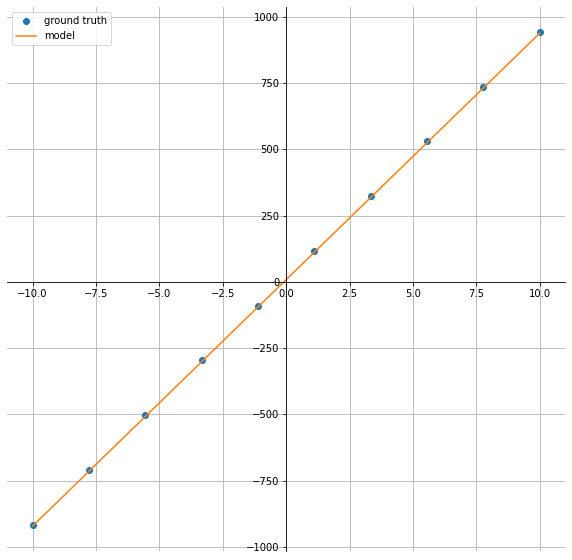

Epoch: 550; Train Loss: 18.036008834838867


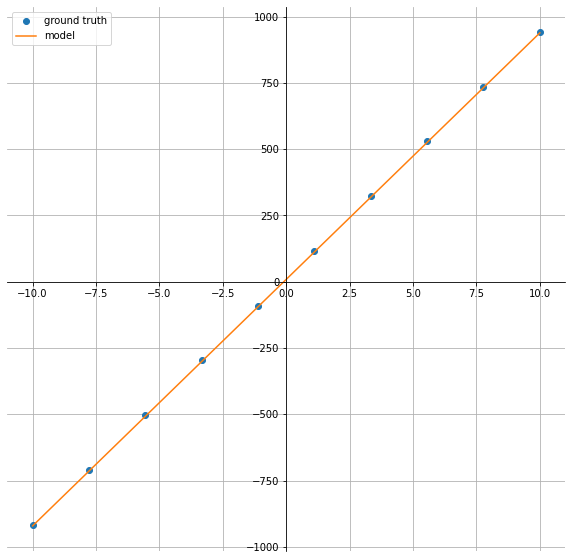

Epoch: 600; Train Loss: 14.763667106628418


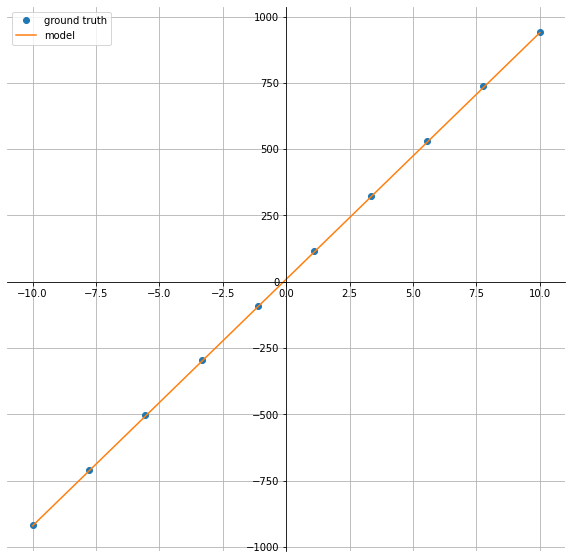

Epoch: 650; Train Loss: 12.085034370422363


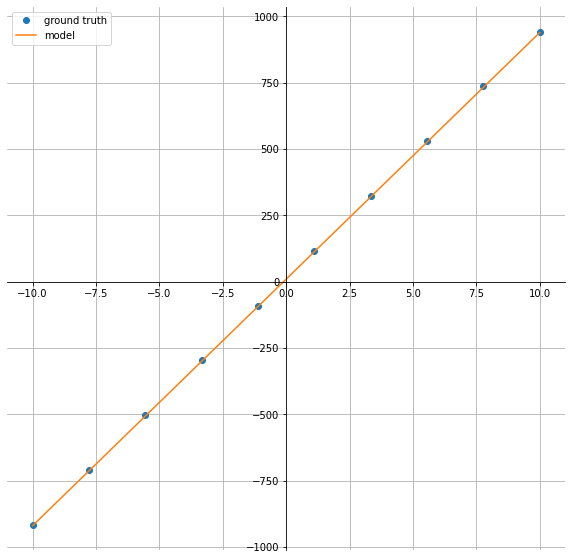

Epoch: 700; Train Loss: 9.89243221282959


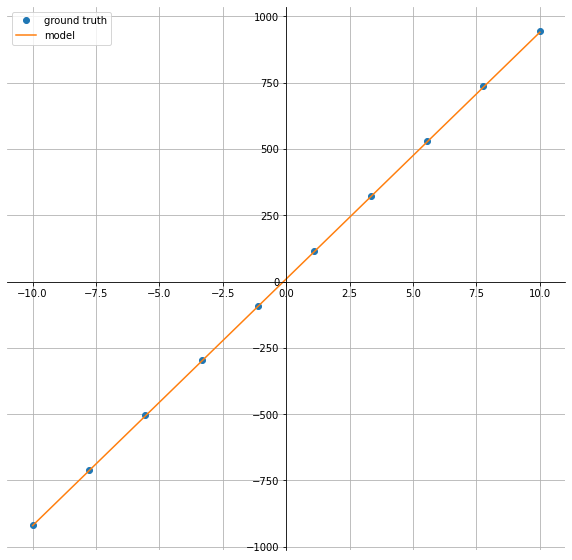

Epoch: 750; Train Loss: 8.097615242004395


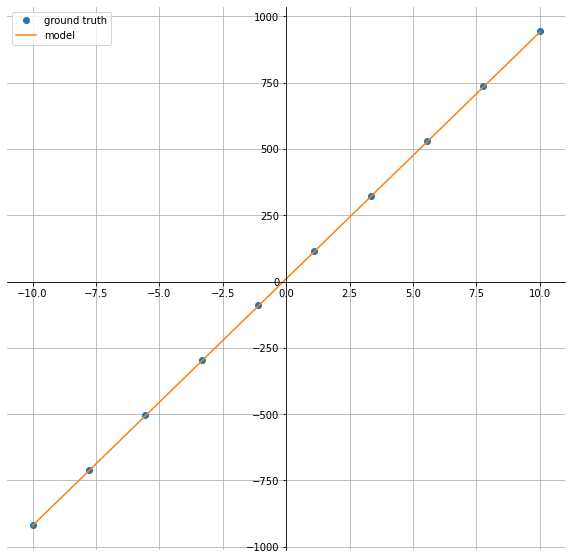

Epoch: 800; Train Loss: 6.628446578979492


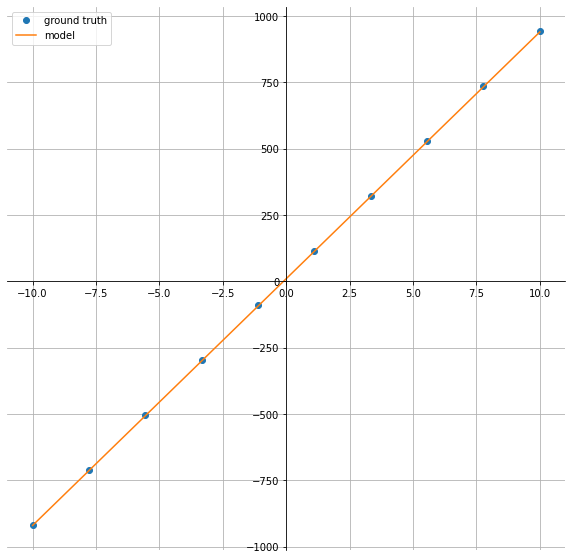

Epoch: 850; Train Loss: 5.42581844329834


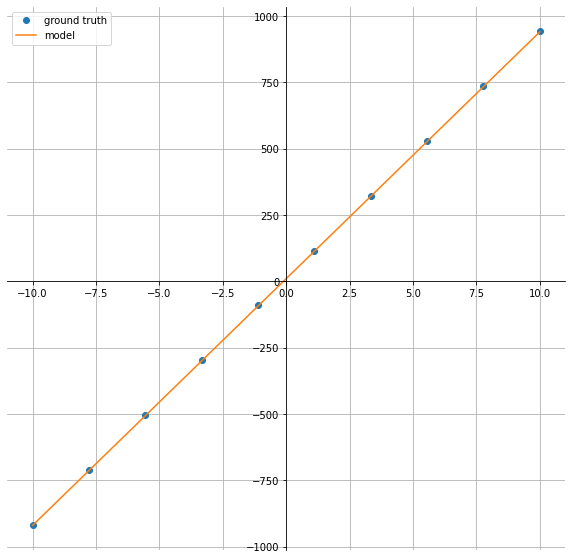

Epoch: 900; Train Loss: 4.441401481628418


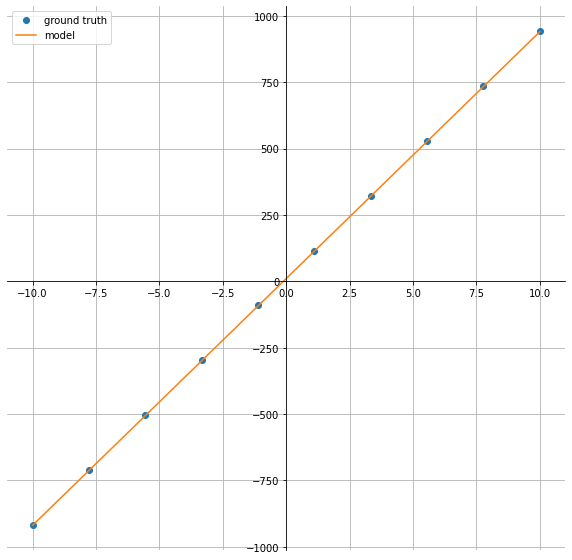

Epoch: 950; Train Loss: 3.63558030128479


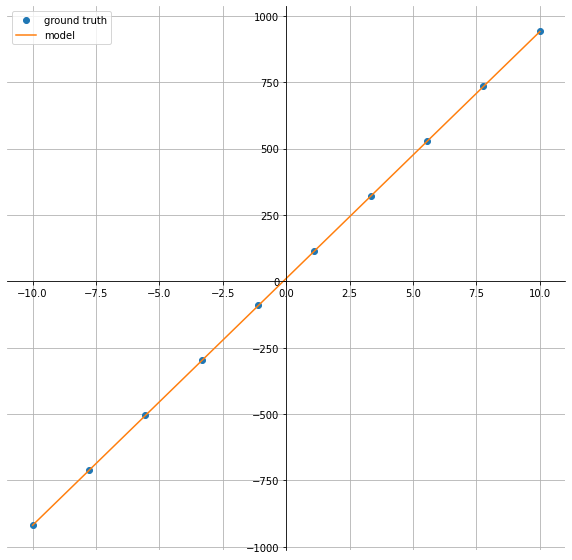

Epoch: 1000; Train Loss: 2.9759576320648193


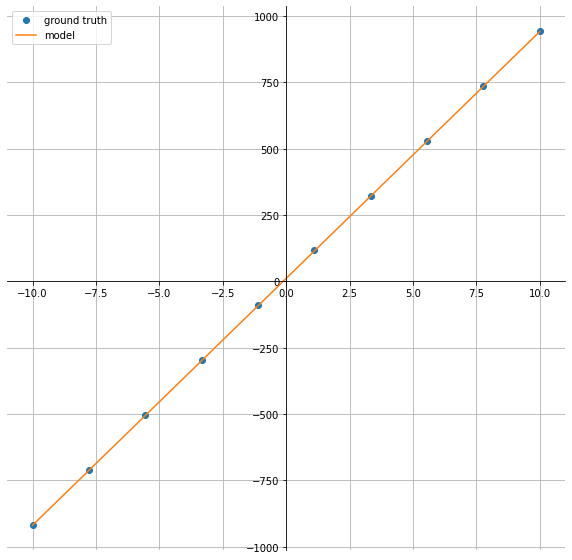

Epoch: 1050; Train Loss: 2.4360198974609375


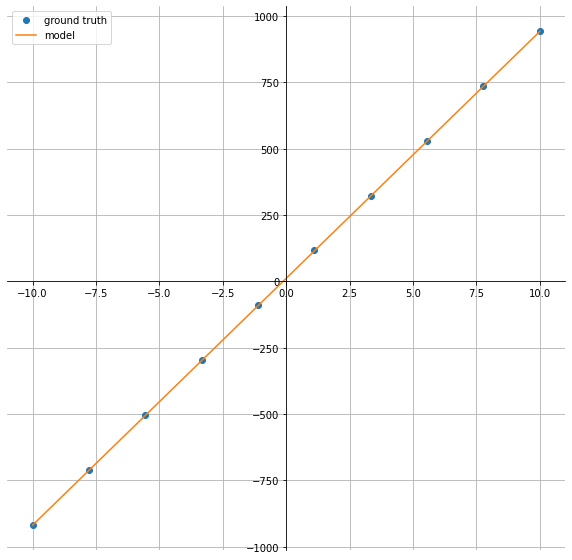

Epoch: 1100; Train Loss: 1.9940522909164429


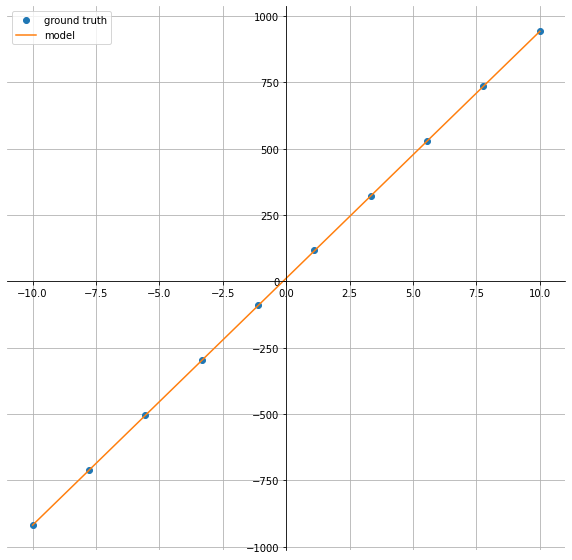

Epoch: 1150; Train Loss: 1.6322647333145142


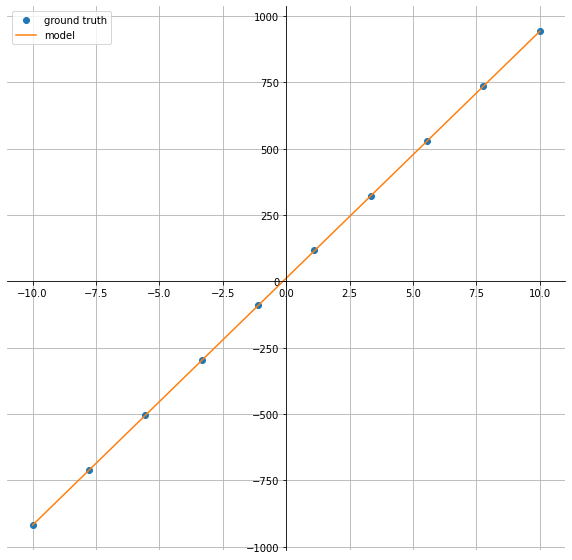

Epoch: 1200; Train Loss: 1.3361222743988037


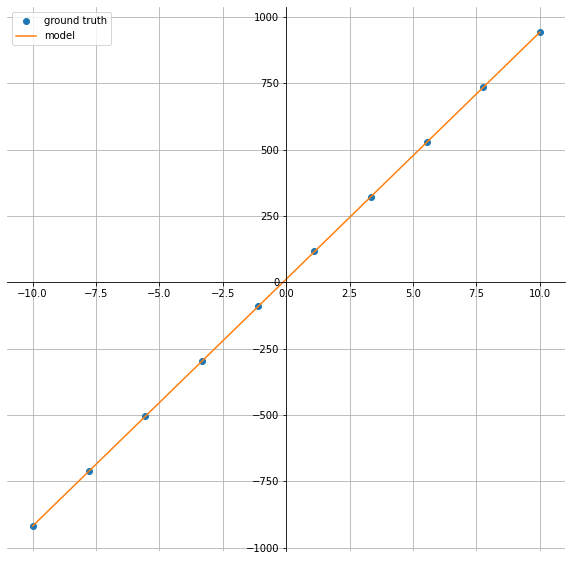

Epoch: 1250; Train Loss: 1.0937013626098633


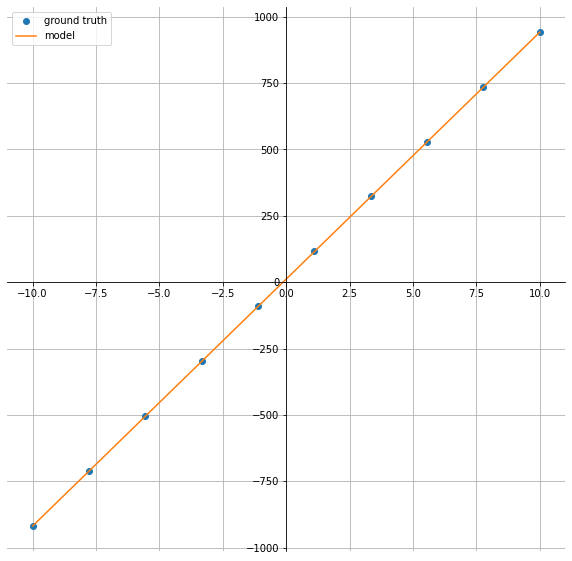

Epoch: 1300; Train Loss: 0.8952728509902954


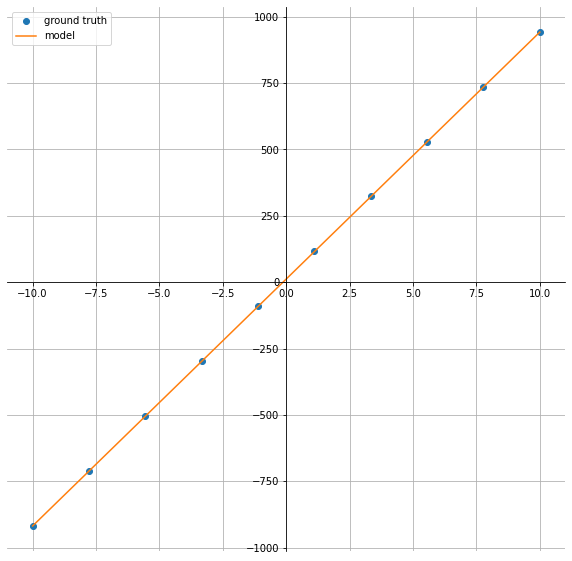

Epoch: 1350; Train Loss: 0.7328436374664307


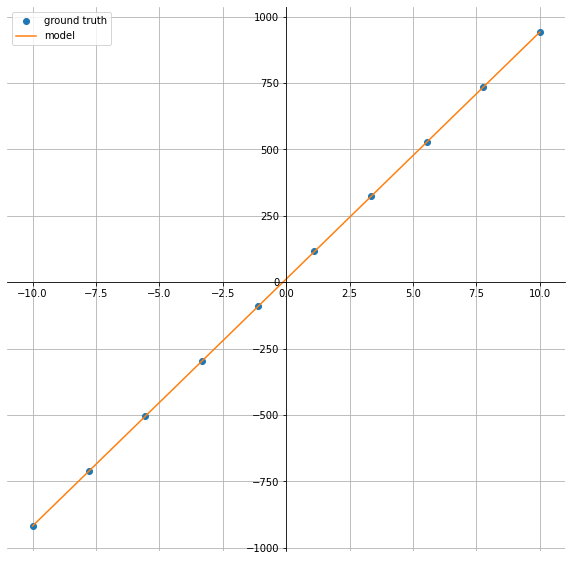

Epoch: 1400; Train Loss: 0.5998793840408325


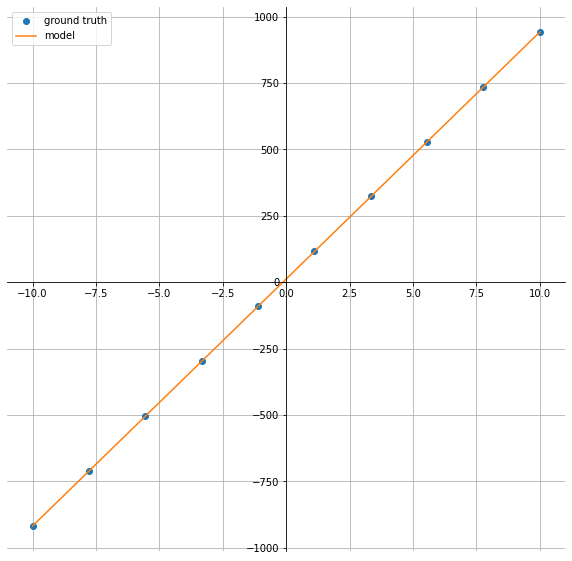

Epoch: 1450; Train Loss: 0.49104687571525574


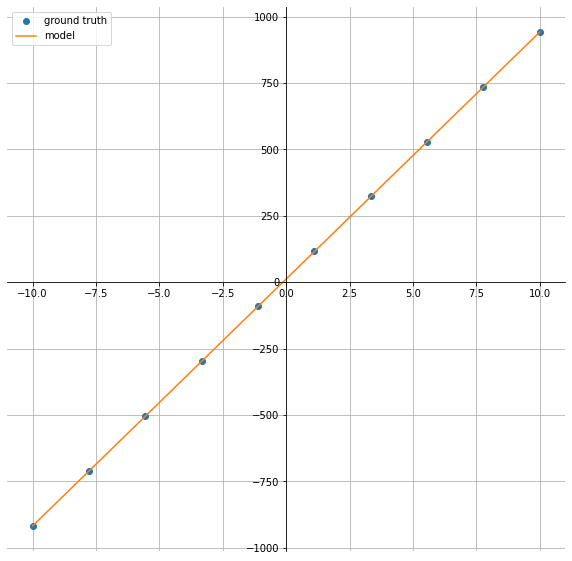

Epoch: 1500; Train Loss: 0.40195444226264954


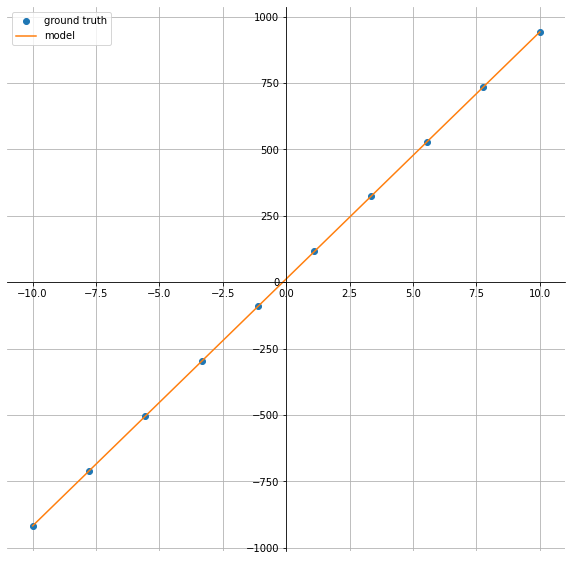

Test Loss: 0.4003125727176666


In [ ]:
epochs = 1501
for t in range(epochs):
  train_loss = train(model, train_dataloader, lossfunc, optimizer)
  if t % 50 == 0:
    print(f"Epoch: {t}; Train Loss: {train_loss}")
    plot_comparinson(line, model)

test_loss = test(model, test_dataloader, lossfunc)
print(f"Test Loss: {test_loss}")

In [ ]:
model.state_dict()

OrderedDict([('layers.0.weight', tensor([[93.0001]], device='cuda:0')),
             ('layers.0.bias', tensor([12.3673], device='cuda:0'))])

# Rede Neural pelo Numpy?

In [ ]:
# Gera um dataset
np.random.seed(93) # Define um seed
x = np.random.rand(100, 1) # Gera 100 valores aleatórios pra X 
y = 13 + 93 * x + .1 * np.random.randn(100, 1) # Cria o Y

# Embaralha os índices
idx = np.arange(100) # índices
np.random.shuffle(idx) # Embaralhamento

# Usa os primeiro 800 índices embaralhados pra treino
train_idx = idx[:80]
# Usa os outros 200 índices para teste
val_idx = idx[80:]

# Gera o dataset de treino e de teste
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


np.random.seed(93)
a = np.random.randn(1)
b = np.random.randn(1)

lr = 1e-2
n_epochs = 100000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(a, b)

[12.96838057] [93.05602666]


# Rede Neural mais complexa

![](https://www.deeplearningbook.com.br/wp-content/uploads/2017/12/neuralnetworks-1.png)

In [ ]:
class MultiLayerNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(1, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 8),
        nn.ReLU(),
        nn.Linear(8, 1),
    )

  def forward(self, x):
    return self.layers(x)

In [ ]:
multimodel = MultiLayerNetwork().to(device)

In [ ]:
from math import cos

In [ ]:
f = lambda x: cos(x/2)

In [ ]:
train_dataset = AlgebraicDataset(f, interval, train_nsamples)
test_dataset = AlgebraicDataset(f, interval, test_nsamples)

train_dataloader = DataLoader(train_dataset, train_nsamples, shuffle=True)
test_dataloader = DataLoader(test_dataset, test_nsamples, shuffle=True)

In [ ]:
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(multimodel.parameters(), lr=1e-2)

In [ ]:
epochs = 20001
for t in range(epochs):
  train_loss = train(multimodel, train_dataloader, lossfunc, optimizer)
  if t % 100 == 0:
    print(f"Epoch: {t}; Train Loss: {train_loss}")
    plot_comparinson(f, multimodel, nsamples=40)

test_loss = test(multimodel, test_dataloader, lossfunc)
print(f"Test Loss: {test_loss}")

In [ ]:
multimodel.state_dict()

# Para brincar:

[TensorFlow Playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.16081&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

[Mas o que *é* uma Rede Neural?](https://www.youtube.com/watch?v=aircAruvnKk&t=300s)